In [1]:
import Pkg; Pkg.instantiate()
Pkg.activate(".")
using DrugResponseModel
concs, _, g1s1, g2s1 = load(189, 1);
_, _, g1s2, g2s2 = load(189, 2);
_, _, g1s3, g2s3 = load(189, 3);
g1m = (g1s1 .+ g1s2 .+ g1s3) ./ 3;
g2m = (g2s1 .+ g2s2 .+ g2s3) ./ 3;

Precompiling project...
  ✓ DrugResponseModel
1 dependency successfully precompiled in 8 seconds (138 already precompiled)
  Activating environment at `~/ODE/DrugResponseModel.jl/Project.toml`


In [2]:
pp = DrugResponseModel.optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2])


Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 58526 evals, 58425 steps, improv/step: 0.146 (last = 0.1465), fitness=26774.089658194
DE modify state:

Optimization stopped after 100001 steps and 171.10 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 584.46
Function evals per second = 585.02
Improvements/step = 0.13631
Total function evaluations = 100097


Best candidate found: [107.372, 0.923638, 0.282427, 0.254554, 1.0, 1.0, 0.858377, 0.0001, 0.307891, 0.0001, 0.0001, 0.0001, 0.25549, 0.0379866, 0.517865]

Fitness: 26774.089033053



(26774.08903305288, [107.3723105998403, 0.923637597469749, 0.28242715250868544, 0.2545539730360934, 0.9999999996109649, 0.9999999998377941, 0.8583766925920664, 0.00010000008488005755, 0.3078908695904424, 0.00010000011837782561, 0.00010000000600763668, 0.00010000000042838751, 0.25549033263701476, 0.03798657258801513, 0.5178654659219515])

In [3]:
ps = DrugResponseModel.getODEparams(pp[2], concs[:, 2])

9×8 Matrix{Float64}:
 0.282404     0.282061     0.279628   …  0.267514    0.263311    0.259976
 1.0          1.0          1.0           1.0         1.0         1.0
 0.857659     0.847103     0.77218       0.399161    0.269759    0.167061
 0.307634     0.303848     0.276979      0.143209    0.0968037   0.0599747
 8.35888e-8   1.31356e-6   1.0043e-5     5.35043e-5  6.85814e-5  8.0547e-5
 8.35888e-8   1.31356e-6   1.0043e-5  …  5.35043e-5  6.85814e-5  8.0547e-5
 0.000213561  0.00335601   0.0256589     0.136698    0.175219    0.20579
 3.17525e-5   0.000498975  0.003815      0.0203245   0.0260517   0.030597
 0.517865     0.517865     0.517865      0.517865    0.517865    0.517865

In [4]:
G1 = zeros(189, 7)
G2 = zeros(189, 7)
t = LinRange(0.0, 95.0, 189)
for i = 1:7 # concentration number
    G1[:, i], G2[:, i], _ = predict(ps[:, i], 10.0, t)
end

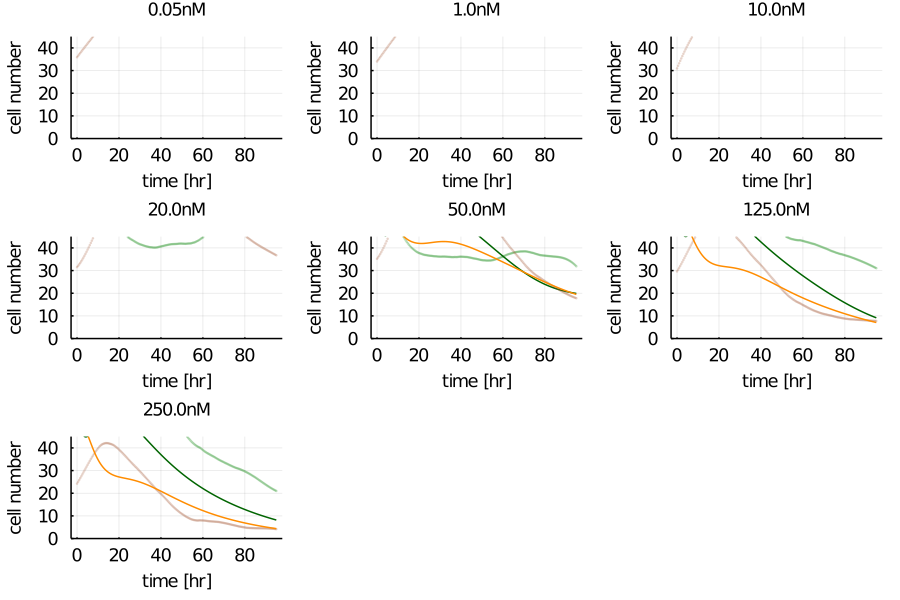

In [5]:
using Plots
p1 = DrugResponseModel.plotavg(G1, G2, g1m[:, :, 2], g2m[:, :, 2], 1, :false, concs[1, 2])
p =[DrugResponseModel.plotavg(G1, G2, g1m[:, :, 2], g2m[:, :, 2], i, :false, concs[i, 2]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)